<a href="https://colab.research.google.com/github/rena-ds/regression-riskscore/blob/main/Regression%20Analysis%20on%20Risk%20Score%20Using%20Financial%20Risk%20for%20Loan%20Approval%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis on Risk Score Using Financial Risk for Loan Approval Dataset

# Business Understanding

## Background

- Evaluating the risk of loan default is very important to minimizing losses and making the right financial decisions.
- Advances in data technology and predictive modeling allow risk scoring systems to generate continuous scores that can be used in credit approval and credit scoring decisions.
- `Financial Risk for Loan Approval` dataset is used in this project to build a regression model for accurate risk score prediction and actionable insights.

## Problem

- Current risk scoring methods often fail to accurately identify borrower profiles, leading to inaccurate predictions of loan defaults.
- Overreliance on old or manual systems creates operational inefficiencies that make it difficult for financial institutions to effectively manage risk.

## Objective

Create a regression model for continuous risk scoring with high accuracy.

# Dataset Information

`Financial Risk for Loan Approval`

Link kaggle: [Dataset](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data)

This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment.

Features:
- ApplicationDate:	Loan application date, essential for tracking the history of loan requests.
- Age: The applicant's age, an indicator of financial stability.
- AnnualIncome:	Annual income, representing the individual's financial capacity.
- CreditScore:	Credit score that measures the applicant's ability to repay.
- EmploymentStatus:	Employment status, reflecting income stability.
- EducationLevel:	Education level, which can influence income prospects.
- Experience:	Years of work experience, indicating consistency in the labor market.
- LoanAmount:	The requested loan amount.
- LoanDuration:	The repayment period of the loan.
- MaritalStatus:	The applicant's marital status, which can affect financial obligations.
- NumberOfDependents:	The number of dependents the applicant supports.
- HomeOwnershipStatus:	Type of homeownership (owned or rented), related to financial security.
- MonthlyDebtPayments:	Monthly debt payments, showing the level of indebtedness.
- CreditCardUtilizationRate:	Credit utilization percentage, an important factor in risk assessment.
- NumberOfOpenCreditLines:	The number of active credit lines.
- NumberOfCreditInquiries:	The number of credit inquiries, a potential signal of financial need.
- DebtToIncomeRatio:	The ratio of total debt to income, representing the level of debt relative to salary.
- BankruptcyHistory:	History of bankruptcies, a strong indicator of risk.
- LoanPurpose:	The reason for the loan (e.g., personal use, mortgage, education).
- PreviousLoanDefaults:	Records of defaults on previous loans.
- PaymentHistory:	Payment history, reflecting the applicant's financial behavior.
- LengthOfCreditHistory:	The duration of the credit history, indicating how long credit has been used.
- SavingsAccountBalance:	The balance in the savings account, showing financial reserves.
- CheckingAccountBalance: The balance in the checking account, representing immediate liquidity.
- TotalAssets: Total assets owned by the applicant, such as real estate and investments.
- TotalLiabilities:	The applicant’s total debt, a key measure of financial health.
- MonthlyIncome:	Monthly income, directly affecting the ability to make payments.
- UtilityBillsPaymentHistory:	Payment history for utility bills, indicating financial responsibility.
- JobTenure:	Job duration.
- NetWorth:	Total financial worth.
- BaseInterestRate:	Starting interest rate.
- InterestRate:	Applied interest rate.
- MonthlyLoanPayment:	Monthly loan payment.
- TotalDebtToIncomeRatio:	Total debt against icome.
- LoanApproved:	Loan approval status.
- RiskScore:	Risk assessment score.


# Import Dataset

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [2]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 2.9 MB/s eta 0:00:00


In [3]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=8ff6971a226ce919d79378ed9fb8f89b6b4132d1980158dec8b185e067e1bedf
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex


In [4]:
# Import dataset
import dalex as dx
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostRegressor
from google.colab import drive
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from xgboost import XGBRegressor

# Load Dataset

In [5]:
# Connect to Google Drive
drive.mount('/content/drive')
url = "/content/drive/My Drive/Bootcamp DS Dibimbing.id/Final Project/Dataset/Loan.csv"

Mounted at /content/drive


In [6]:
# Load dataset
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,3,Rent,673,0.101288,5,1,0.468077,0,Auto,0,21,7,235,3429,80969,25642,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,5,Rent,414,0.471818,2,0,0.317372,0,Debt Consolidation,0,30,28,6910,183,69571,5569,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,3,Mortgage,512,0.216596,3,1,0.023014,0,Home,0,28,8,2175,746,108316,4653,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,3,Own,986,0.364758,4,1,0.534517,0,Debt Consolidation,0,17,13,3037,260,22085,11485,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


# Data Cleaning

In [7]:
# Show the dimensions
df.shape

(20000, 36)

In [8]:
# Show the total number of elements
df.size

720000

In [9]:
# Show the general infomration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [10]:
# Show the descriptive statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


In [11]:
# Show the descriptive statistics for non-numeric columns
df.describe(include = 'object').T

,count,unique,top,freq
ApplicationDate,20000,20000,2018-01-01,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


In [12]:
# Show the type of each feature
df.dtypes

,0
ApplicationDate,object
Age,int64
AnnualIncome,int64
CreditScore,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
LoanAmount,int64
LoanDuration,int64
MaritalStatus,object


In [13]:
# Adjust 'ApplicationDate' format
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])

In [14]:
# Extract month from 'ApplicationDate'
df['Month'] = df['ApplicationDate'].dt.month
df['Month'].value_counts()

,count
Month,
1,1705
3,1705
5,1705
7,1705
8,1705
10,1677
12,1674
4,1650
6,1650


In [15]:
# Show the number of unique values each column
df.nunique()

,0
ApplicationDate,20000
Age,63
AnnualIncome,17516
CreditScore,322
EmploymentStatus,3
EducationLevel,5
Experience,62
LoanAmount,15578
LoanDuration,10
MaritalStatus,4


In [16]:
# Check for missing values
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [17]:
# Check for duplicates
df.duplicated().sum()

0

In [18]:
# Displays the number of NaN for each column
df.isna().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


# Exploratory Data Analysis (Before Feature Engineering)

In [19]:
# Set the figure aesthetics
sns.set(style = "ticks")

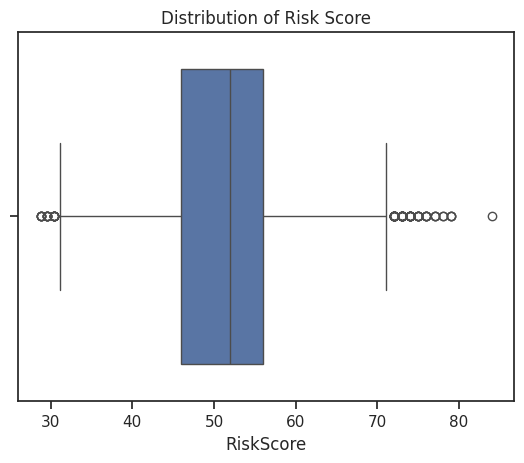

In [20]:
# Show boxplot of 'RiskScore'
sns.boxplot(x = df['RiskScore'])
plt.title('Distribution of Risk Score')
plt.show()

`RiskScore` has median around 50.

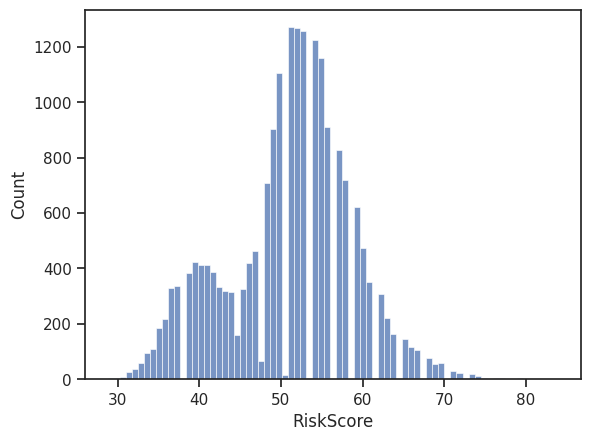

In [21]:
# Show histogram plot of 'RiskScore'
sns.histplot(x = df['RiskScore'])
plt.show()

The distribution shape of `RiskScore` is skewed to the right.

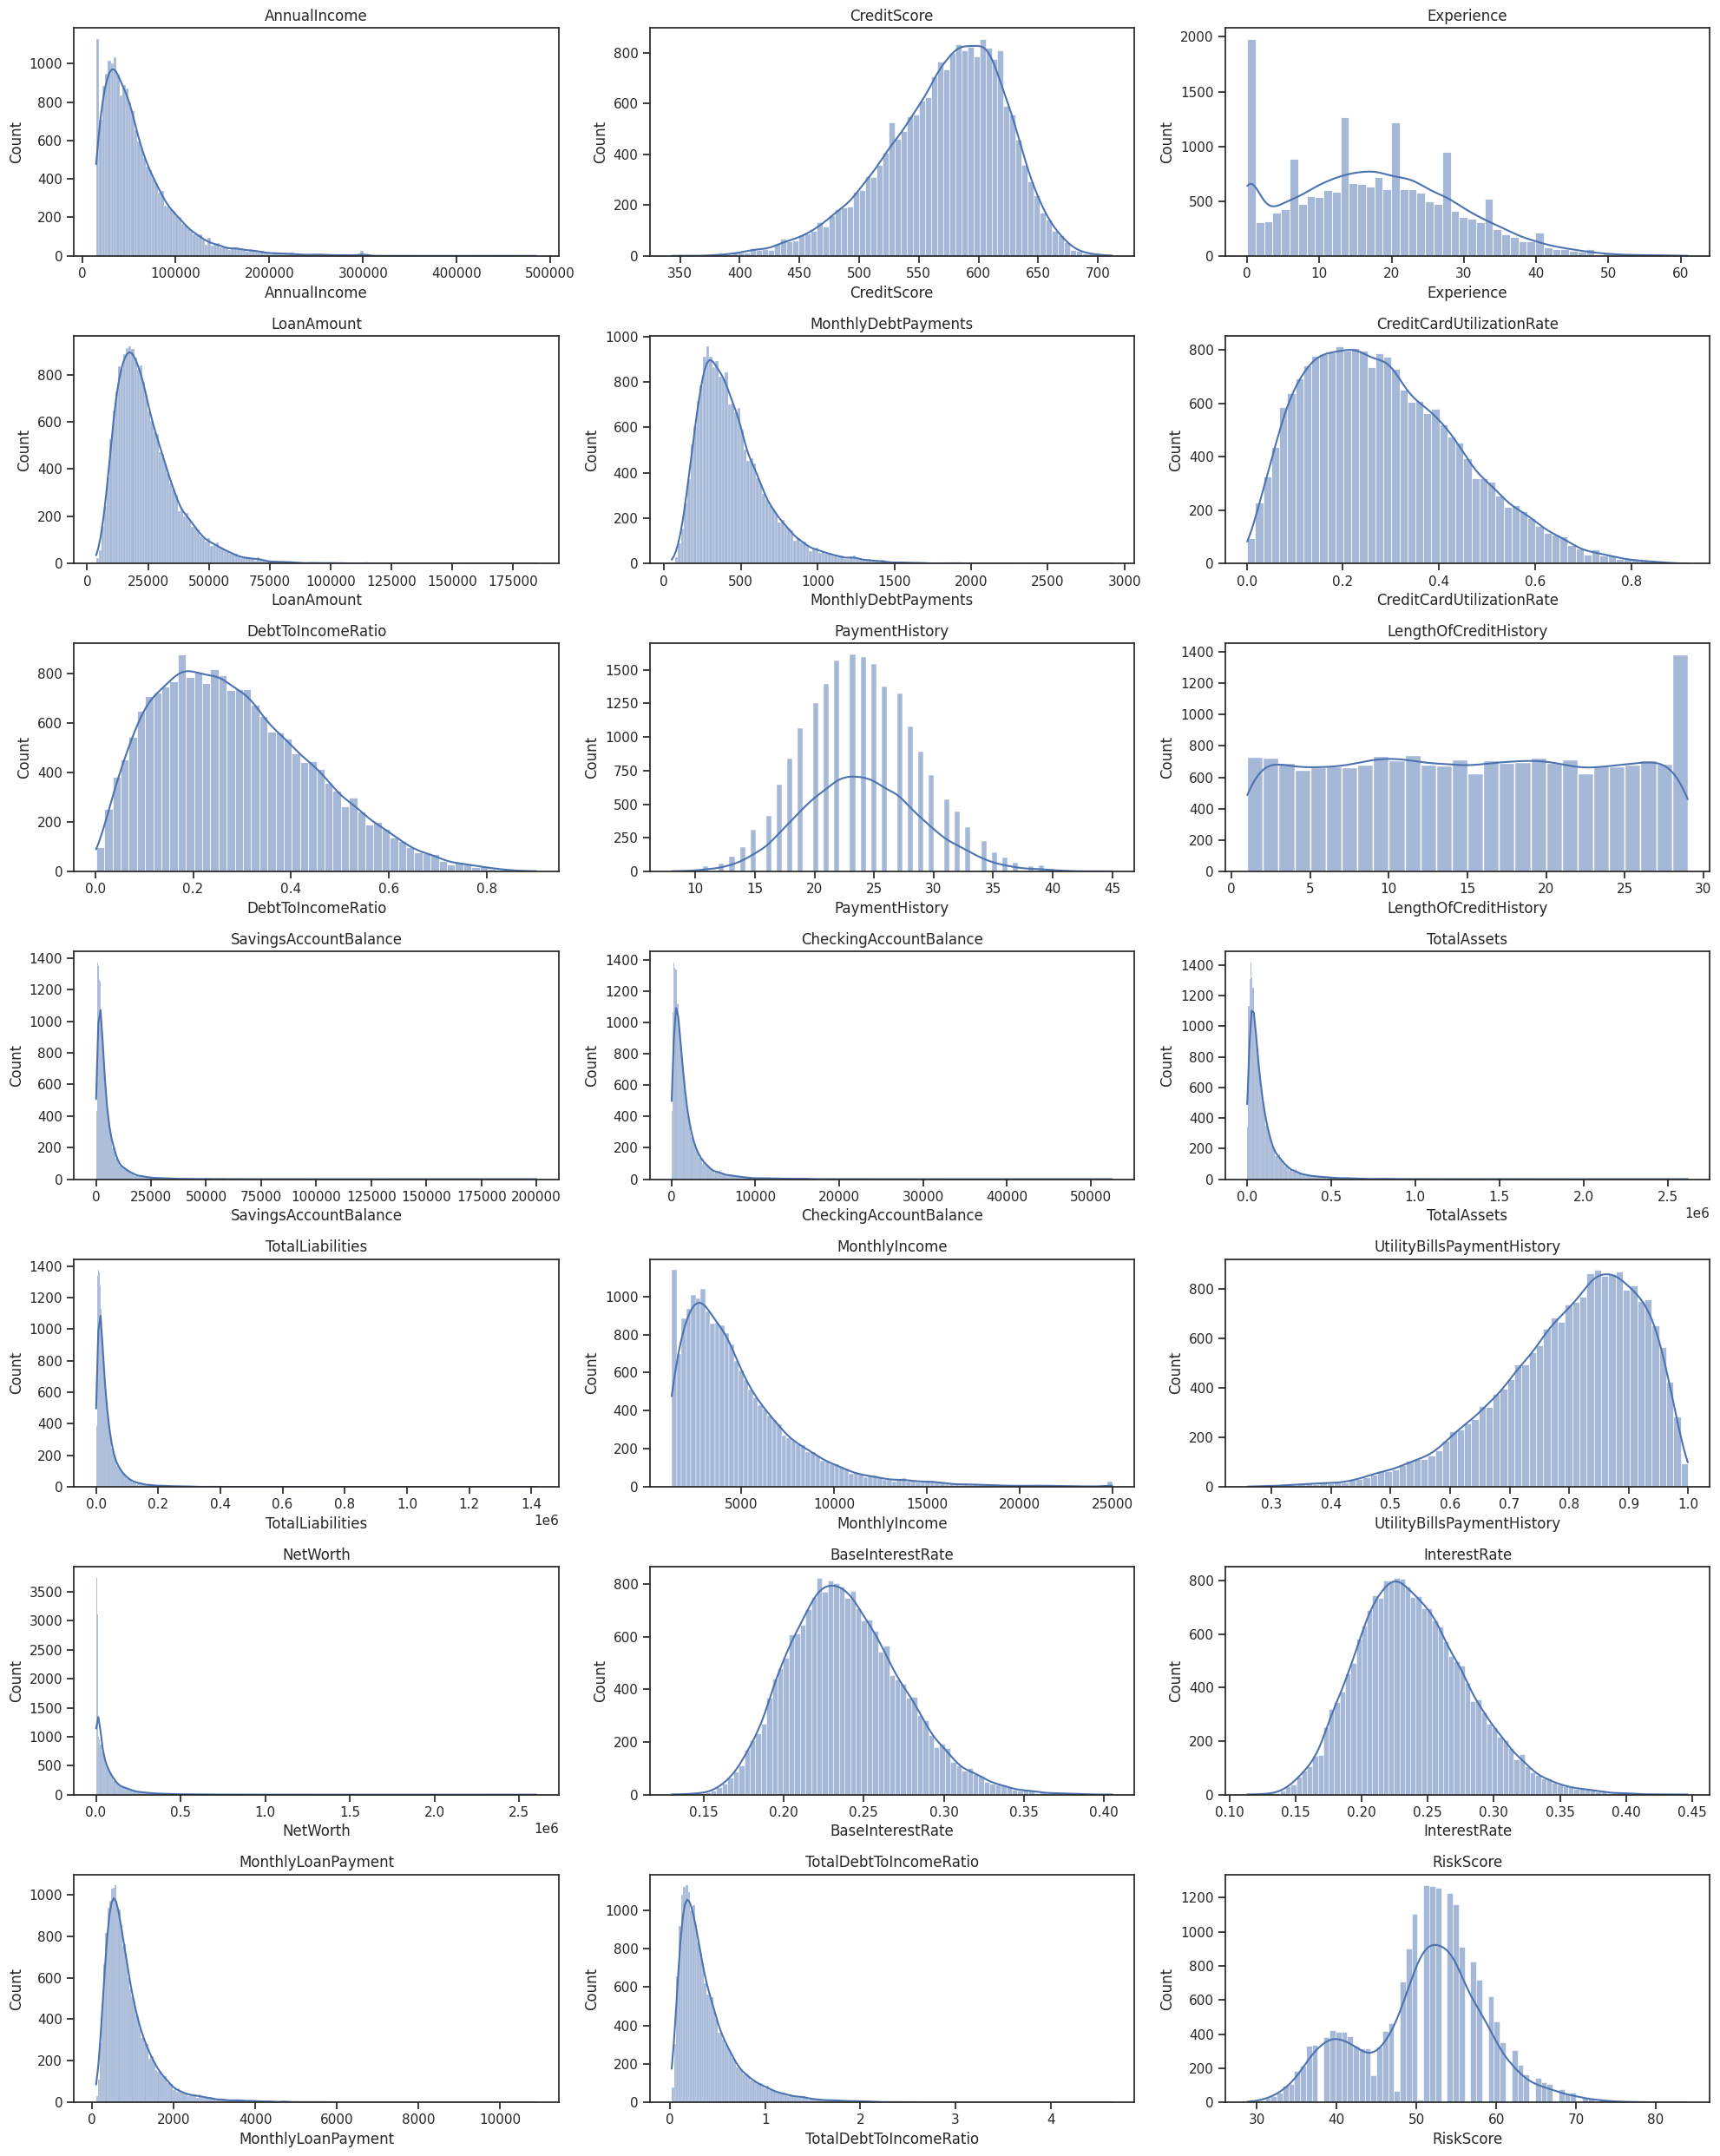

In [22]:
# Displays a grid visualization of histograms
fig, axes = plt.subplots(7, 3, figsize = (20, 25))
sns.histplot(df['AnnualIncome'], kde = True, ax = axes[0, 0]).set_title('AnnualIncome')
sns.histplot(df['CreditScore'], kde = True, ax = axes[0, 1]).set_title('CreditScore')
sns.histplot(df['Experience'], kde = True, ax = axes[0, 2]).set_title('Experience')
sns.histplot(df['LoanAmount'], kde = True, ax = axes[1, 0]).set_title('LoanAmount')
sns.histplot(df['MonthlyDebtPayments'], kde = True, ax = axes[1, 1]).set_title('MonthlyDebtPayments')
sns.histplot(df['CreditCardUtilizationRate'], kde = True, ax = axes[1, 2]).set_title('CreditCardUtilizationRate')
sns.histplot(df['DebtToIncomeRatio'], kde = True, ax = axes[2, 0]).set_title('DebtToIncomeRatio')
sns.histplot(df['PaymentHistory'], kde = True, ax = axes[2, 1]).set_title('PaymentHistory')
sns.histplot(df['LengthOfCreditHistory'], kde = True, ax = axes[2, 2]).set_title('LengthOfCreditHistory')
sns.histplot(df['SavingsAccountBalance'], kde = True, ax = axes[3, 0]).set_title('SavingsAccountBalance')
sns.histplot(df['CheckingAccountBalance'], kde = True, ax = axes[3, 1]).set_title('CheckingAccountBalance')
sns.histplot(df['TotalAssets'], kde = True, ax = axes[3, 2]).set_title('TotalAssets')
sns.histplot(df['TotalLiabilities'], kde = True, ax = axes[4, 0]).set_title('TotalLiabilities')
sns.histplot(df['MonthlyIncome'], kde = True, ax = axes[4, 1]).set_title('MonthlyIncome')
sns.histplot(df['UtilityBillsPaymentHistory'], kde = True, ax = axes[4, 2]).set_title('UtilityBillsPaymentHistory')
sns.histplot(df['NetWorth'], kde = True, ax = axes[5, 0]).set_title('NetWorth')
sns.histplot(df['BaseInterestRate'], kde = True, ax = axes[5, 1]).set_title('BaseInterestRate')
sns.histplot(df['InterestRate'], kde = True, ax = axes[5, 2]).set_title('InterestRate')
sns.histplot(df['MonthlyLoanPayment'], kde = True, ax = axes[6, 0]).set_title('MonthlyLoanPayment')
sns.histplot(df['TotalDebtToIncomeRatio'], kde = True, ax = axes[6, 1]).set_title('TotalDebtToIncomeRatio')
sns.histplot(df['RiskScore'], kde = True, ax = axes[6, 2]).set_title('RiskScore')
plt.tight_layout()
plt.show()

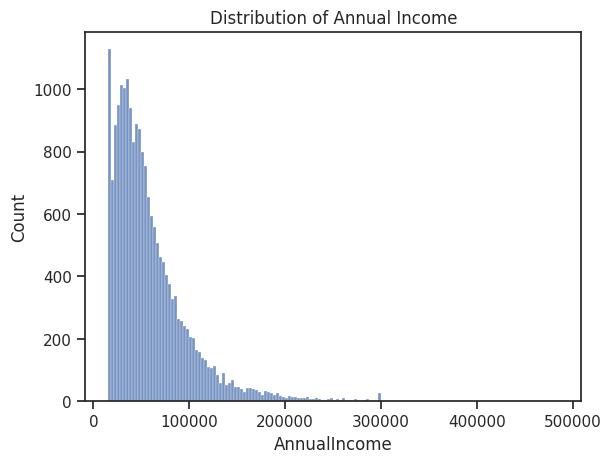

In [23]:
# Show histogram plot of 'AnnualIncome'
sns.histplot(x = df['AnnualIncome'])
plt.title('Distribution of Annual Income')
plt.show()

More individuals take out loans with lower annual incomes than with higher ones. This could be due to several factors such as the level of awareness of saving, knowledge of how to manage money well, and so on.

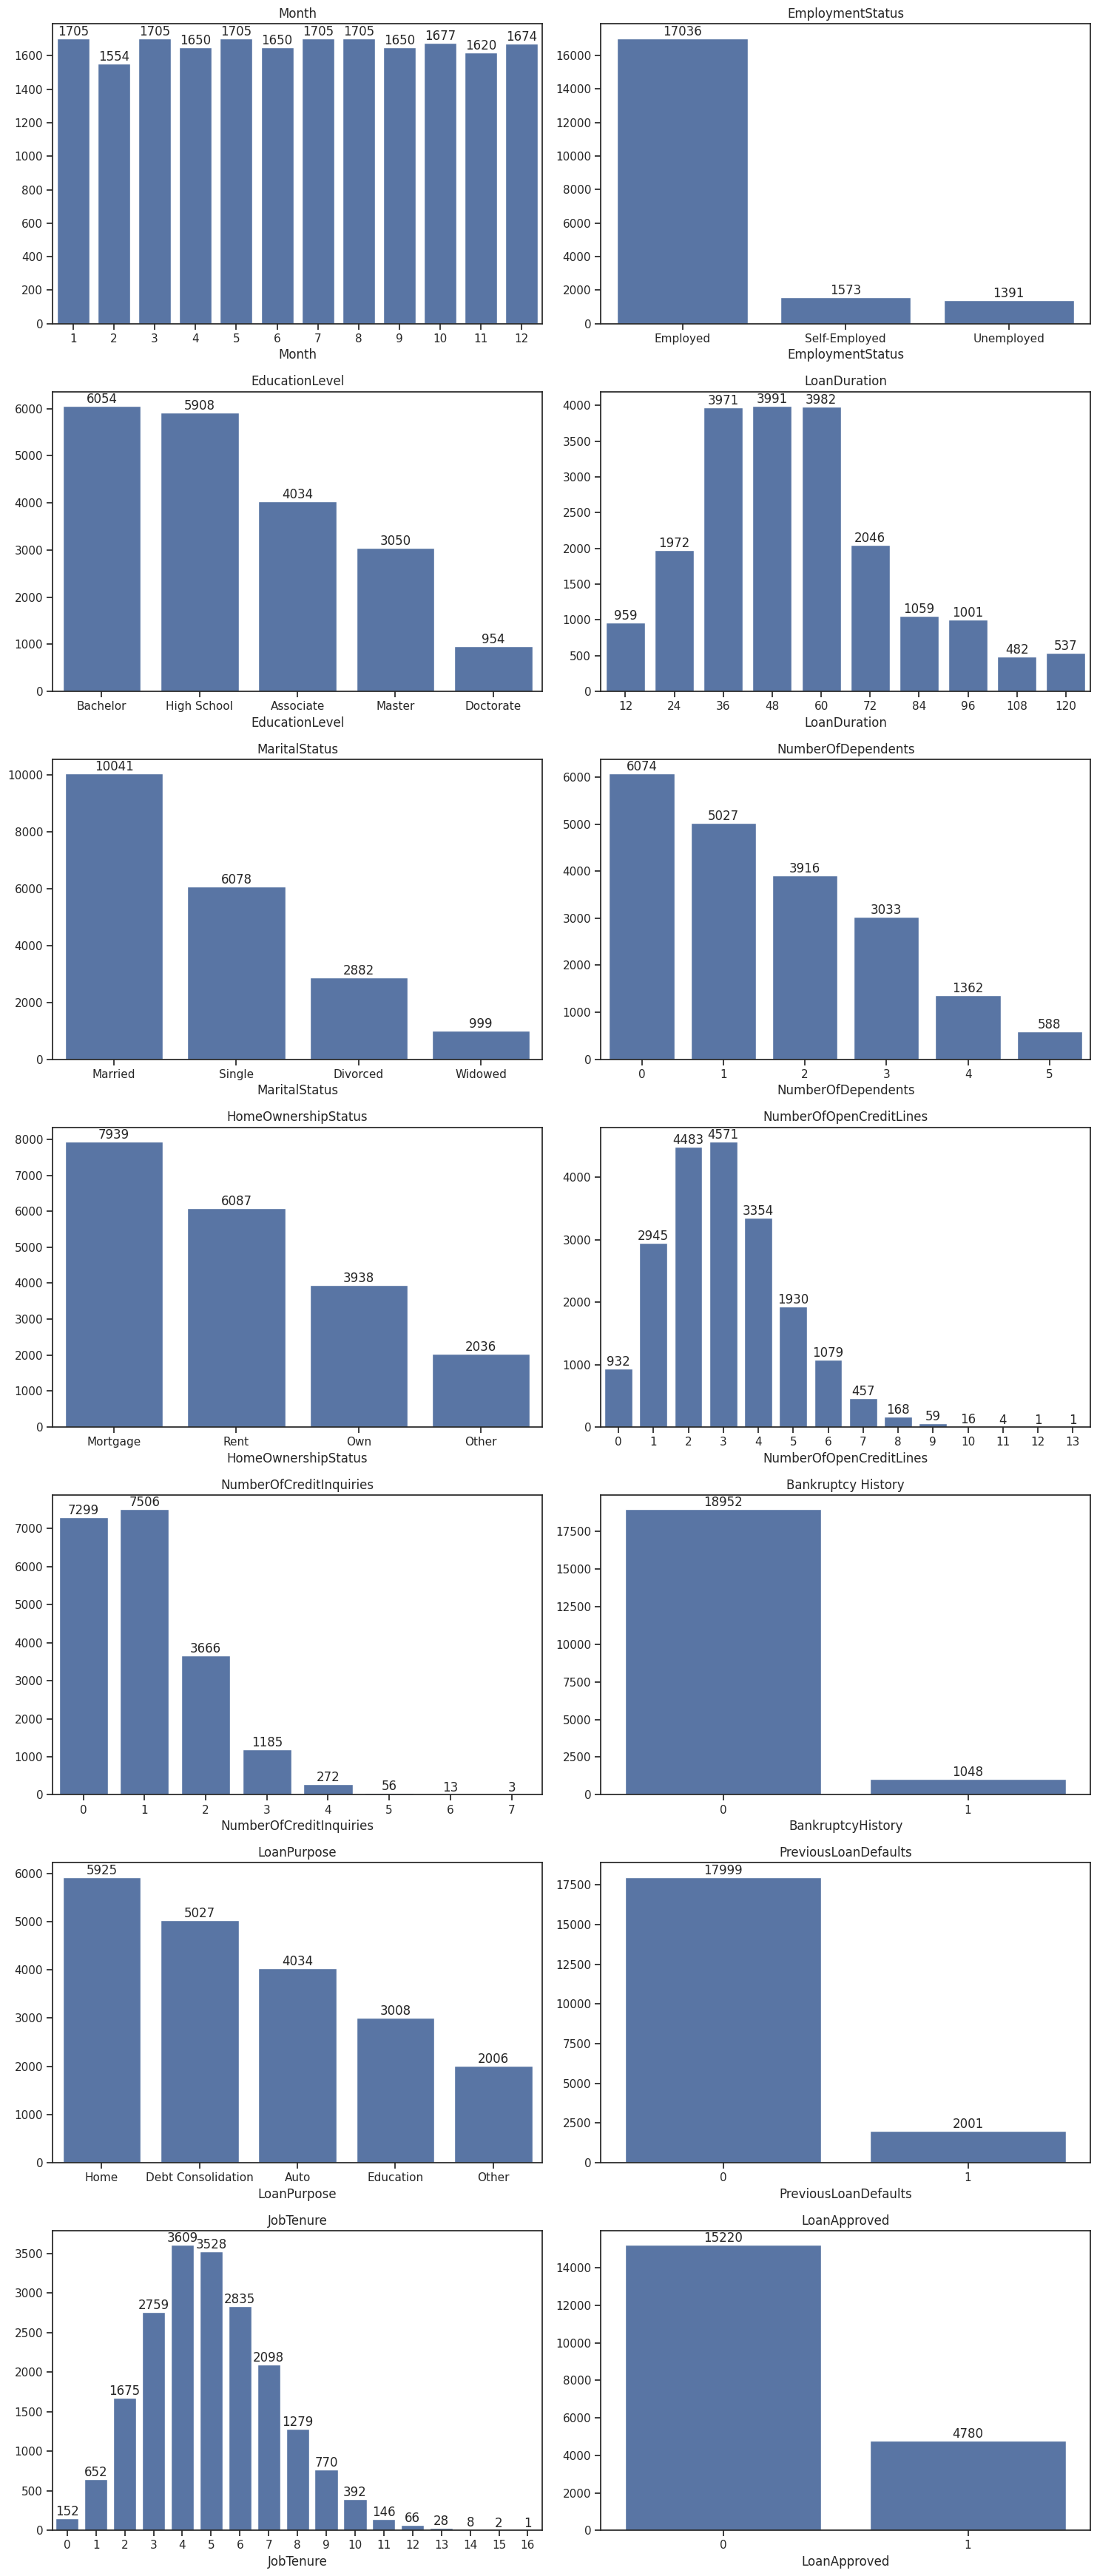

In [24]:
# Displays a grid visualization of barplot
fig, axes = plt.subplots(7, 2, figsize = (15, 35))
sns.barplot(x = df['Month'].value_counts().index, y = df['Month'].value_counts().values, ax = axes[0, 0]).set_title('Month')
sns.barplot(x = df['EmploymentStatus'].value_counts().index, y = df['EmploymentStatus'].value_counts().values, ax = axes[0, 1]).set_title('EmploymentStatus')
sns.barplot(x = df['EducationLevel'].value_counts().index, y = df['EducationLevel'].value_counts().values, ax = axes[1, 0]).set_title('EducationLevel')
sns.barplot(x = df['LoanDuration'].value_counts().index, y = df['LoanDuration'].value_counts().values, ax = axes[1, 1]).set_title('LoanDuration')
sns.barplot(x = df['MaritalStatus'].value_counts().index, y = df['MaritalStatus'].value_counts().values, ax = axes[2, 0]).set_title('MaritalStatus')
sns.barplot(x = df['NumberOfDependents'].value_counts().index, y = df['NumberOfDependents'].value_counts().values, ax = axes[2, 1]).set_title('NumberOfDependents')
sns.barplot(x = df['HomeOwnershipStatus'].value_counts().index, y = df['HomeOwnershipStatus'].value_counts().values, ax = axes[3, 0]).set_title('HomeOwnershipStatus')
sns.barplot(x = df['NumberOfOpenCreditLines'].value_counts().index, y = df['NumberOfOpenCreditLines'].value_counts().values, ax = axes[3, 1]).set_title('NumberOfOpenCreditLines')
sns.barplot(x = df['NumberOfCreditInquiries'].value_counts().index, y = df['NumberOfCreditInquiries'].value_counts().values, ax = axes[4, 0]).set_title('NumberOfCreditInquiries')
sns.barplot(x = df['BankruptcyHistory'].value_counts().index, y = df['BankruptcyHistory'].value_counts().values, ax = axes[4, 1]).set_title('Bankruptcy History')
sns.barplot(x = df['LoanPurpose'].value_counts().index, y = df['LoanPurpose'].value_counts().values, ax = axes[5, 0]).set_title('LoanPurpose')
sns.barplot(x = df['PreviousLoanDefaults'].value_counts().index, y = df['PreviousLoanDefaults'].value_counts().values, ax = axes[5, 1]).set_title('PreviousLoanDefaults')
sns.barplot(x = df['JobTenure'].value_counts().index, y = df['JobTenure'].value_counts().values, ax = axes[6, 0]).set_title('JobTenure')
sns.barplot(x = df['LoanApproved'].value_counts().index, y = df['LoanApproved'].value_counts().values, ax = axes[6, 1]).set_title('LoanApproved')
for ax in axes.flatten():
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.05,
                str(int(p.get_height())), ha='center', va='bottom')
plt.tight_layout()
plt.show()

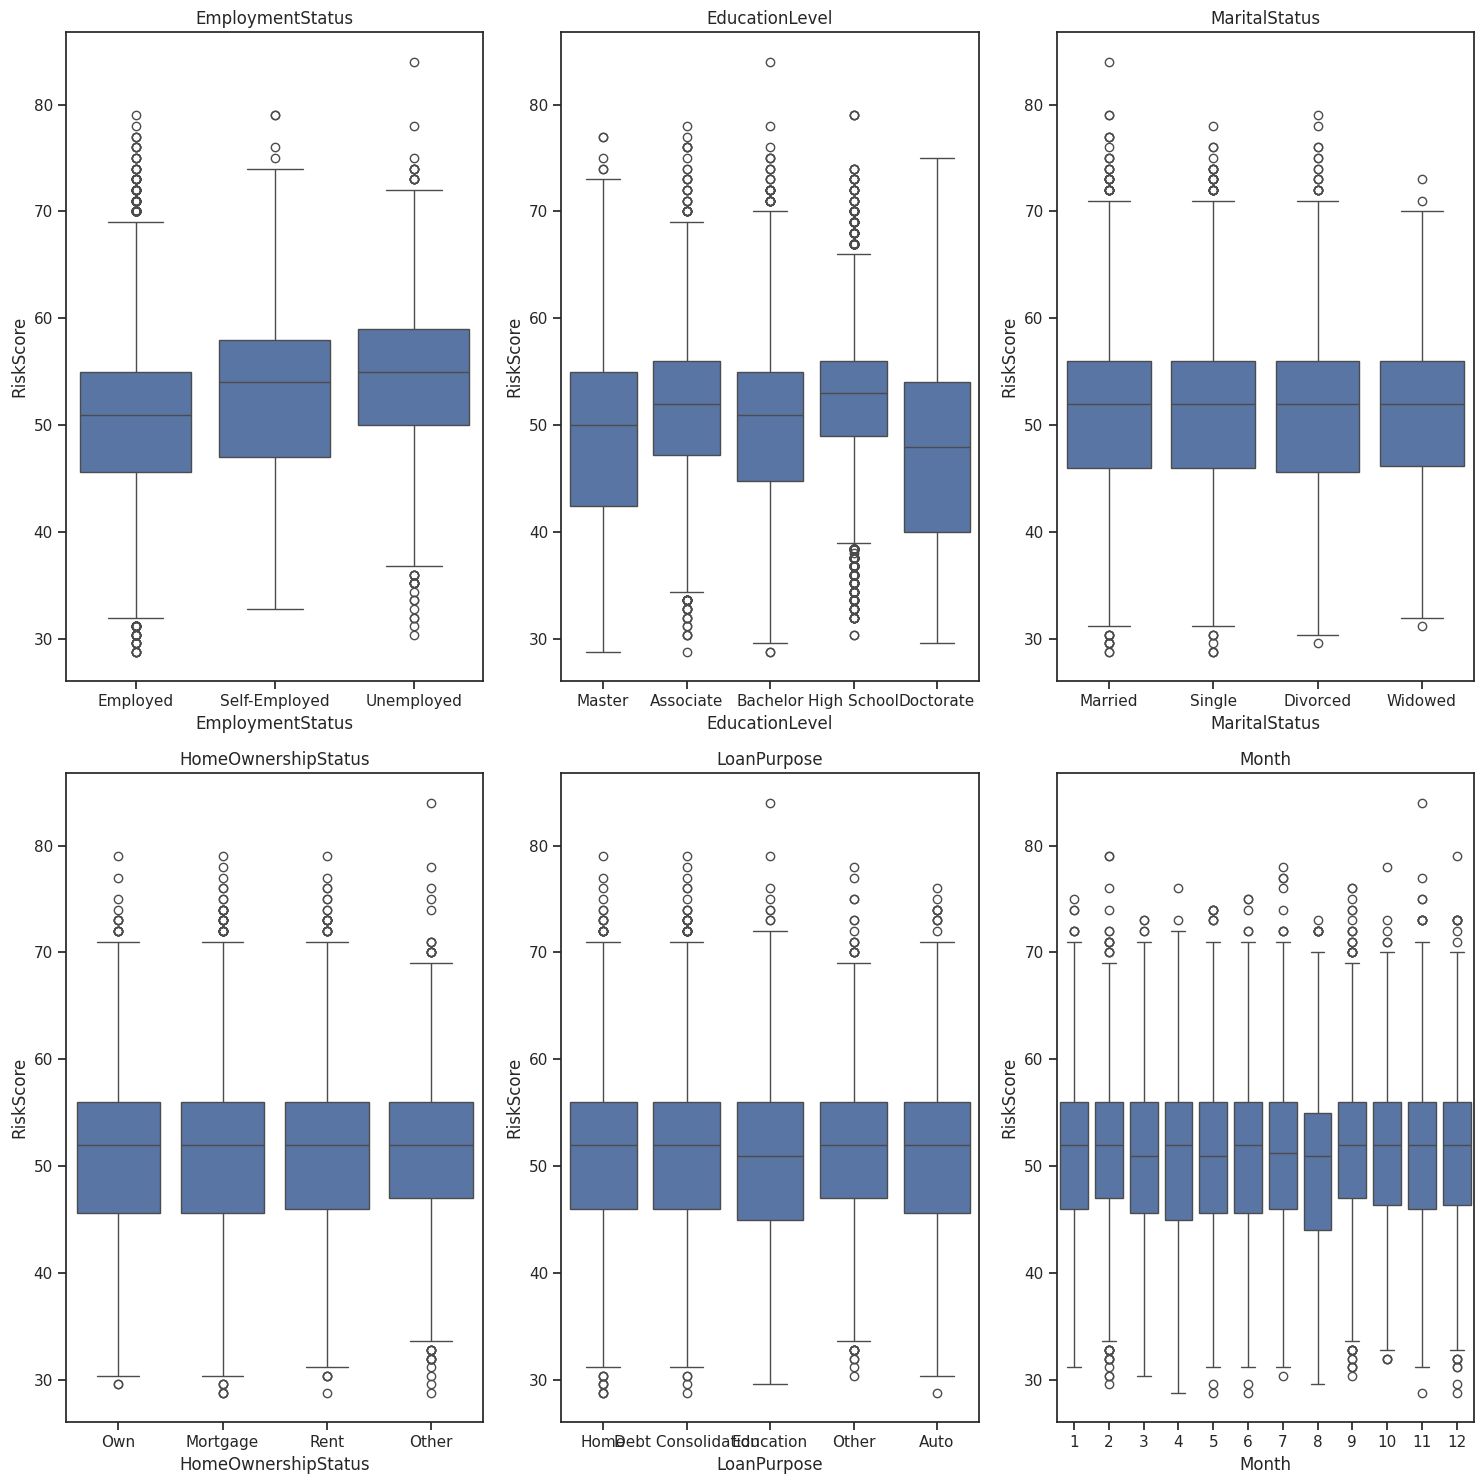

In [25]:
# Displays a grid visualization of boxplot
fig, axes = plt.subplots(2, 3, figsize = (15, 15))
sns.boxplot(y = 'RiskScore', x = 'EmploymentStatus', data = df, ax = axes[0, 0]).set_title('EmploymentStatus')
sns.boxplot(y = 'RiskScore', x = 'EducationLevel', data = df, ax = axes[0, 1]).set_title('EducationLevel')
sns.boxplot(y = 'RiskScore', x = 'MaritalStatus', data = df, ax = axes[0, 2]).set_title('MaritalStatus')
sns.boxplot(y = 'RiskScore', x = 'HomeOwnershipStatus', data = df, ax = axes[1, 0]).set_title('HomeOwnershipStatus')
sns.boxplot(y = 'RiskScore', x = 'LoanPurpose', data = df, ax = axes[1, 1]).set_title('LoanPurpose')
sns.boxplot(y = 'RiskScore', x = 'Month', data = df, ax = axes[1, 2]).set_title('Month')
plt.tight_layout()
plt.show()

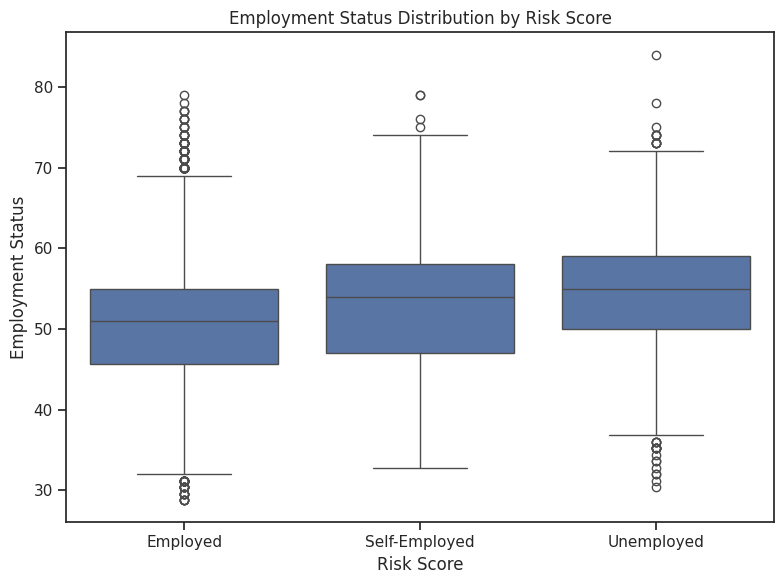

In [26]:
# Displays a visualization of boxplot 'RiskScore' Distribution by 'EmploymentStatus'
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'EmploymentStatus', y = 'RiskScore', data = df)
plt.xlabel('Risk Score')
plt.ylabel('Employment Status')
plt.title('Employment Status Distribution by Risk Score')
plt.tight_layout()
plt.show()

- Employed tend to have lower risk.
- Self-Employed tend to have higher risk, perhaps due to income instability or ongoing business.
- Unemployed tend to have more varied risk, with a small percentage of individuals having very low risk (outliers).

# Feature Engineering

In [27]:
# Create initiation for numeric and category columns
catcol = df.select_dtypes(include = 'object').columns.tolist()
numcol = df.select_dtypes(exclude = 'object').columns.tolist()

In [28]:
# Displays the number of unique values in catcol
for i in numcol:
  print(df[i].value_counts())
  print()

ApplicationDate
2018-01-01    1
2054-07-01    1
2054-07-08    1
2054-07-07    1
2054-07-06    1
             ..
2036-04-02    1
2036-04-01    1
2036-03-31    1
2036-03-30    1
2072-10-03    1
Name: count, Length: 20000, dtype: int64

Age
18    803
40    715
39    682
42    676
37    669
     ... 
80      8
74      8
76      4
78      3
79      3
Name: count, Length: 63, dtype: int64

AnnualIncome
15000     584
300000     26
68064       4
24627       4
36604       4
         ... 
48316       1
50463       1
25001       1
22593       1
53227       1
Name: count, Length: 17516, dtype: int64

CreditScore
609    204
593    182
585    181
604    180
602    180
      ... 
385      1
387      1
693      1
381      1
383      1
Name: count, Length: 322, dtype: int64

Experience
0     1706
18     722
15     666
16     654
13     641
      ... 
56       5
58       4
61       1
59       1
60       1
Name: count, Length: 62, dtype: int64

LoanAmount
21849    6
14075    6
20937    5
21621    5
19627

In [29]:
# Displays the number of unique values in catcol
for i in catcol:
  print(df[i].value_counts())
  print()

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64

EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64

MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64

HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64

LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64



In [30]:
# Create a feature for 'AgeGroup'
def Group_Age(Age):
  if Age <= 34:
    return 'Youth'
  elif Age <= 64:
    return 'Adult'
  else:
    return 'Senior'

df['AgeGroup'] = df['Age'].apply(Group_Age)

In [31]:
# Change the value in the EducationLevel
df['EducationLevel'] = df['EducationLevel'].replace({'Bachelor' : 'Higher Education Level', 'High School' : 'High School', 'Associate' : 'Higher Education Level', 'Master' : 'Higher Education Level', 'Doctorate' : 'Higher Education Level'})

In [32]:
# Create a feature for 'EducationLevelLabel'
def EducationLevelLabel(EducationLevel):
  if EducationLevel == 'High School':
    return 0
  else:
    return 1

df['EducationLevelLabel'] = df['EducationLevel'].apply(EducationLevelLabel).astype(int)

In [33]:
# Displays the number of unique values in 'EducationLevelLabel'
df['EducationLevelLabel'].value_counts()

,count
EducationLevelLabel,
1,14092
0,5908


In [34]:
# Change the value in the MaritalStatus
df['MaritalStatus'] = df['MaritalStatus'].replace({'Married' : 'With Partner', 'Single' : 'Without Partner', 'Divorced' : 'Without Partner', 'Widowed' : 'Without Partner'})

In [35]:
# Create a feature for 'MaritalStatusLabel'
def MaritalStatusLabel(MaritalStatus):
  if MaritalStatus == 'With Partner':
    return 0
  else:
    return 1

df['MaritalStatusLabel'] = df['MaritalStatus'].apply(MaritalStatusLabel)

In [36]:
# Displays the number of unique values in 'MaritalStatusLabel'
df['MaritalStatusLabel'].value_counts()

,count
MaritalStatusLabel,
0,10041
1,9959


In [37]:
# Label encoding for 'HomeOwnershipStatus'
df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].replace({'Rent' : 0, 'Own' : 1, 'Mortgage' : 2, 'Other' : 3})

<ipython-input-37-cf1f21fbda41>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].replace({'Rent' : 0, 'Own' : 1, 'Mortgage' : 2, 'Other' : 3})


In [38]:
# Displays the number of unique values in 'HomeOwnershipStatus'
df['HomeOwnershipStatus'].value_counts()

,count
HomeOwnershipStatus,
2,7939
0,6087
1,3938
3,2036


In [39]:
# Label encoding for 'LoanPurpose'
df['LoanPurpose'] = df['LoanPurpose'].replace({'Home' : 0, 'Debt Consolidation' : 1, 'Auto' : 2, 'Education' : 3, 'Other' : 4})

<ipython-input-39-78a5ebb73e4d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LoanPurpose'] = df['LoanPurpose'].replace({'Home' : 0, 'Debt Consolidation' : 1, 'Auto' : 2, 'Education' : 3, 'Other' : 4})


In [40]:
# Displays the number of unique values in 'LoanPurpose'
df['LoanPurpose'].value_counts()

,count
LoanPurpose,
0,5925
1,5027
2,4034
3,3008
4,2006


In [41]:
# Display DataFrame
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,Month,AgeGroup,EducationLevelLabel,MaritalStatusLabel
0,2018-01-01,45,39948,617,Employed,Higher Education Level,22,13152,48,With Partner,2,1,183,0.354418,1,2,0.358336,0,0,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,1,Adult,1,0
1,2018-01-02,38,39709,628,Employed,Higher Education Level,15,26045,48,Without Partner,1,2,496,0.087827,5,3,0.330274,0,1,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,1,Adult,1,1
2,2018-01-03,47,40724,570,Employed,Higher Education Level,26,17627,36,With Partner,2,0,902,0.137414,2,0,0.244729,0,3,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,1,Adult,1,0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Without Partner,1,2,755,0.267587,2,1,0.436244,0,0,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,1,Adult,0,1
4,2018-01-05,37,103264,594,Employed,Higher Education Level,17,9184,36,With Partner,1,2,274,0.320535,0,0,0.078884,0,1,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,1,Adult,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,With Partner,3,0,673,0.101288,5,1,0.468077,0,2,0,21,7,235,3429,80969,25642,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,9,Adult,0,0
19996,2072-09-30,56,49246,567,Employed,Higher Education Level,33,25818,36,With Partner,5,0,414,0.471818,2,0,0.317372,0,1,0,30,28,6910,183,69571,5569,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,9,Adult,1,0
19997,2072-10-01,44,48958,645,Employed,Higher Education Level,20,37033,72,With Partner,3,2,512,0.216596,3,1,0.023014,0,0,0,28,8,2175,746,108316,4653,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,10,Adult,1,0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,With Partner,3,1,986,0.364758,4,1,0.534517,0,1,0,17,13,3037,260,22085,11485,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,10,Adult,0,0


# Exploratory Data Analysis (After Feature Engineering)

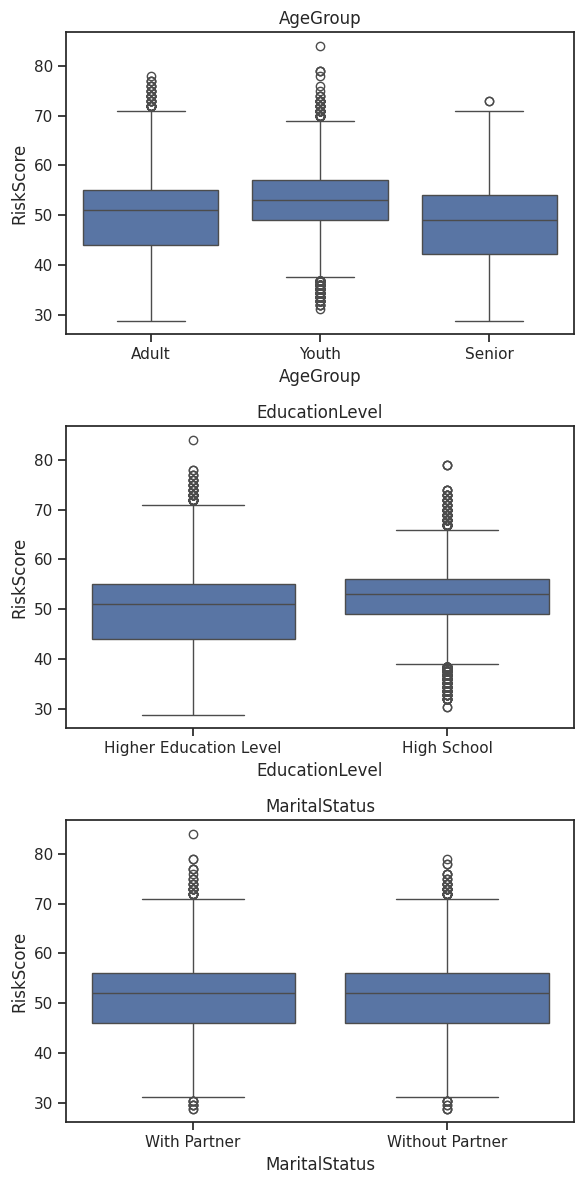

In [42]:
# Displays a visualization of boxplot
fig, axes = plt.subplots(3, 1, figsize = (6, 12))

sns.boxplot(y = 'RiskScore', x = 'AgeGroup', data = df, ax = axes[0]).set_title('AgeGroup')
sns.boxplot(y = 'RiskScore', x = 'EducationLevel', data = df, ax = axes[1]).set_title('EducationLevel')
sns.boxplot(y = 'RiskScore', x = 'MaritalStatus', data = df, ax = axes[2]).set_title('MaritalStatus')

plt.tight_layout()
plt.show()

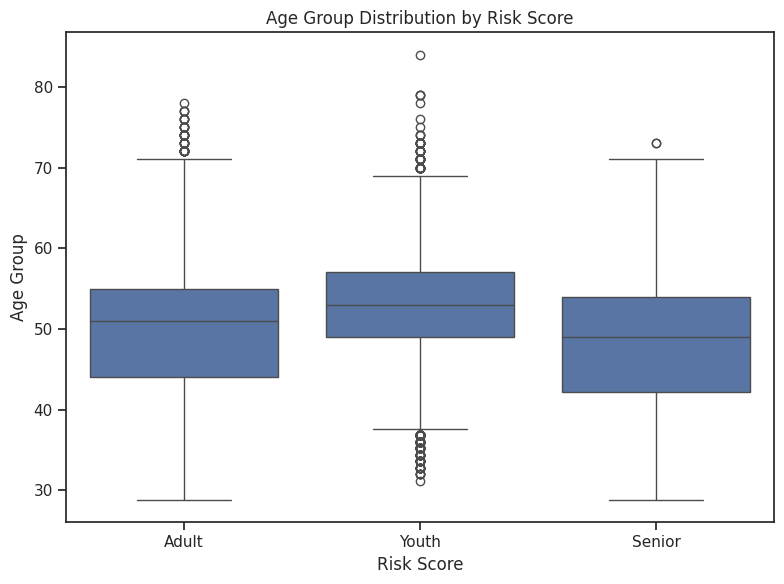

In [43]:
# Displays a visualization of violinplot 'RiskScore' Distribution by 'AgeGroup'
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'AgeGroup', y = 'RiskScore', data = df)
plt.xlabel('Risk Score')
plt.ylabel('Age Group')
plt.title('Age Group Distribution by Risk Score')
plt.tight_layout()
plt.show()

- Youth tend to have a higher RiskScore on the median than other groups, but with the smallest variation. This suggests that this group has a more stable but higher risk profile.
- Adults have a lower RiskScore on the median than Youth but with a larger variation, which may indicate a more heterogeneous risk profile.
- Seniors have a RiskScore distribution similar to Adults, but with fewer outliers, suggesting that this group is more stable in terms of risk.

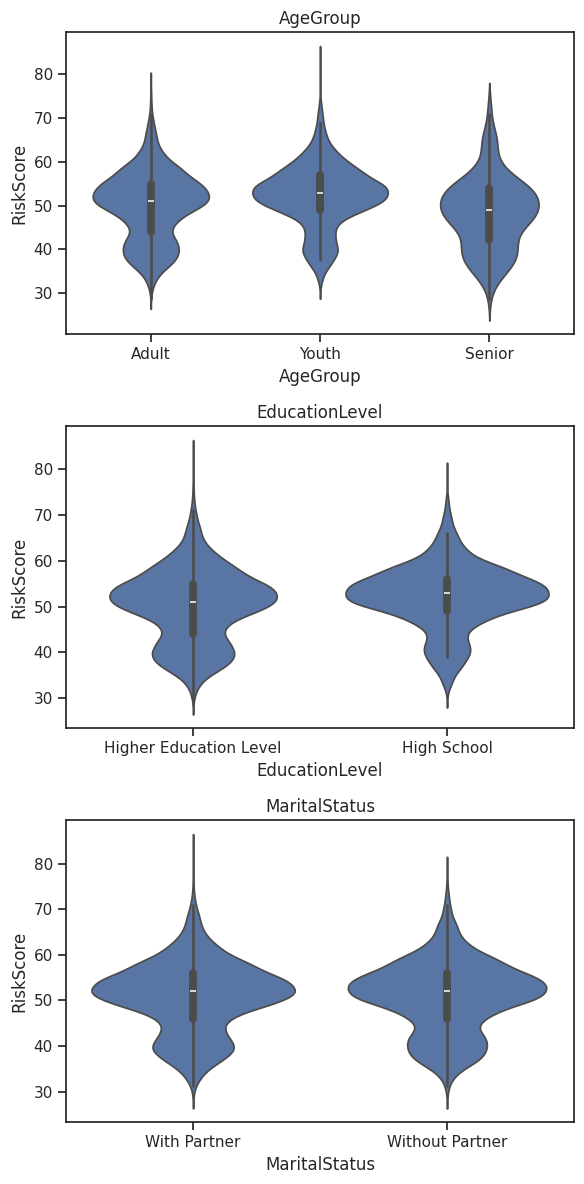

In [44]:
# Displays a visualization of violinplot
fig, axes = plt.subplots(3, 1, figsize = (6, 12))

sns.violinplot(y = 'RiskScore', x = 'AgeGroup', data = df, ax = axes[0]).set_title('AgeGroup')
sns.violinplot(y = 'RiskScore', x = 'EducationLevel', data = df, ax = axes[1]).set_title('EducationLevel')
sns.violinplot(y = 'RiskScore', x = 'MaritalStatus', data = df, ax = axes[2]).set_title('MaritalStatus')

plt.tight_layout()
plt.show()

# Modeling

In [45]:
# Drop unused columns
df = df.drop(columns = ['ApplicationDate', 'AgeGroup', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus'])

In [46]:
# Separate features and targets
X = df.drop(columns=['RiskScore'])
y = df['RiskScore']

# Split into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# Display the top rows of training data and testing data
display(X_train.head())
display(X_test.head())

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,Month,EducationLevelLabel,MaritalStatusLabel
5894,45,15000,620,21,17419,36,3,1,519,0.368528,3,2,0.297167,0,1,0,20,20,2601,455,72122,12405,1250.000000,0.832612,7,59717,0.192419,0.199351,646.777017,0.932622,0,2,1,0
3728,25,49855,486,3,18998,48,5,1,404,0.148286,2,0,0.762549,0,1,0,23,4,2841,2102,62488,68894,4154.583333,0.510667,4,4711,0.270998,0.277787,659.717604,0.256035,0,3,1,0
8958,51,38932,576,30,17844,72,1,0,491,0.411293,1,0,0.128680,0,0,0,17,21,3383,2035,32491,65273,3244.333333,0.835804,4,2228,0.244844,0.250450,481.159537,0.299648,0,7,1,0
7671,18,58116,516,0,24050,60,0,2,831,0.141719,3,0,0.308723,0,0,0,24,25,9175,285,112872,59908,4843.000000,0.851177,4,52964,0.271050,0.254826,712.720107,0.318753,0,1,0,0
5999,25,62939,562,3,27263,36,0,0,766,0.232934,3,1,0.465777,0,2,1,19,14,5036,132,190687,1509,5244.916667,0.587644,3,189178,0.231263,0.185010,992.488743,0.335275,0,6,1,0


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,Month,EducationLevelLabel,MaritalStatusLabel
10650,37,100761,604,16,28479,84,0,2,88,0.280949,3,1,0.430751,0,1,0,23,19,2254,1421,10213,2909,8396.750000,0.809983,7,7304,0.251479,0.222397,671.369324,0.090436,1,2,0,1
2041,35,189154,509,11,11222,60,2,2,411,0.289522,2,4,0.148908,0,1,0,30,12,4456,3706,42599,20156,15762.833333,0.831507,7,22443,0.261722,0.270451,342.970300,0.047832,1,8,0,0
8668,44,73272,483,20,31573,48,0,1,442,0.513947,4,1,0.206626,0,0,0,21,25,5212,1619,75175,55131,6106.000000,0.800830,1,20044,0.285073,0.342088,1215.387601,0.271436,0,9,0,1
1114,41,57115,412,20,21937,12,3,0,409,0.256789,1,1,0.184681,0,1,0,23,14,5046,1389,6435,40497,4759.583333,0.954407,5,1714,0.280937,0.280613,2117.710361,0.530868,0,1,1,0
13902,39,61155,551,19,31510,48,0,0,533,0.216696,6,1,0.184185,0,1,0,19,3,9010,2117,72697,16756,5096.250000,0.840267,3,55941,0.251010,0.250815,1046.213156,0.309877,0,1,1,1


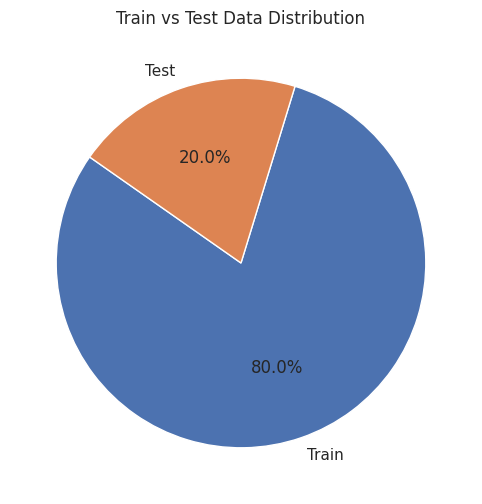

In [48]:
# Displays the distribution of train and test data
plt.figure(figsize = (8, 6))
plt.pie([len(X_train), len(X_test)], labels = ['Train', 'Test'], autopct = '%1.1f%%', startangle = 145)
plt.title('Train vs Test Data Distribution')
plt.show()

In [49]:
# Calculate the VIF scores for each feature
def calculate_vif(X):
  vif = pd.DataFrame()
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

vif_df = calculate_vif(X_train)
vif_df

,Features,VIF
0,Age,29.742230
1,AnnualIncome,48.370673
2,CreditScore,115.345379
3,Experience,29.822990
4,LoanAmount,16.587841
5,LoanDuration,16.076125
6,NumberOfDependents,1.001800
7,HomeOwnershipStatus,1.001436
8,MonthlyDebtPayments,1.148458
9,CreditCardUtilizationRate,1.001273


There are many features with high VIF scores indicating a very strong correlation between the variables and thus need to be addressed.

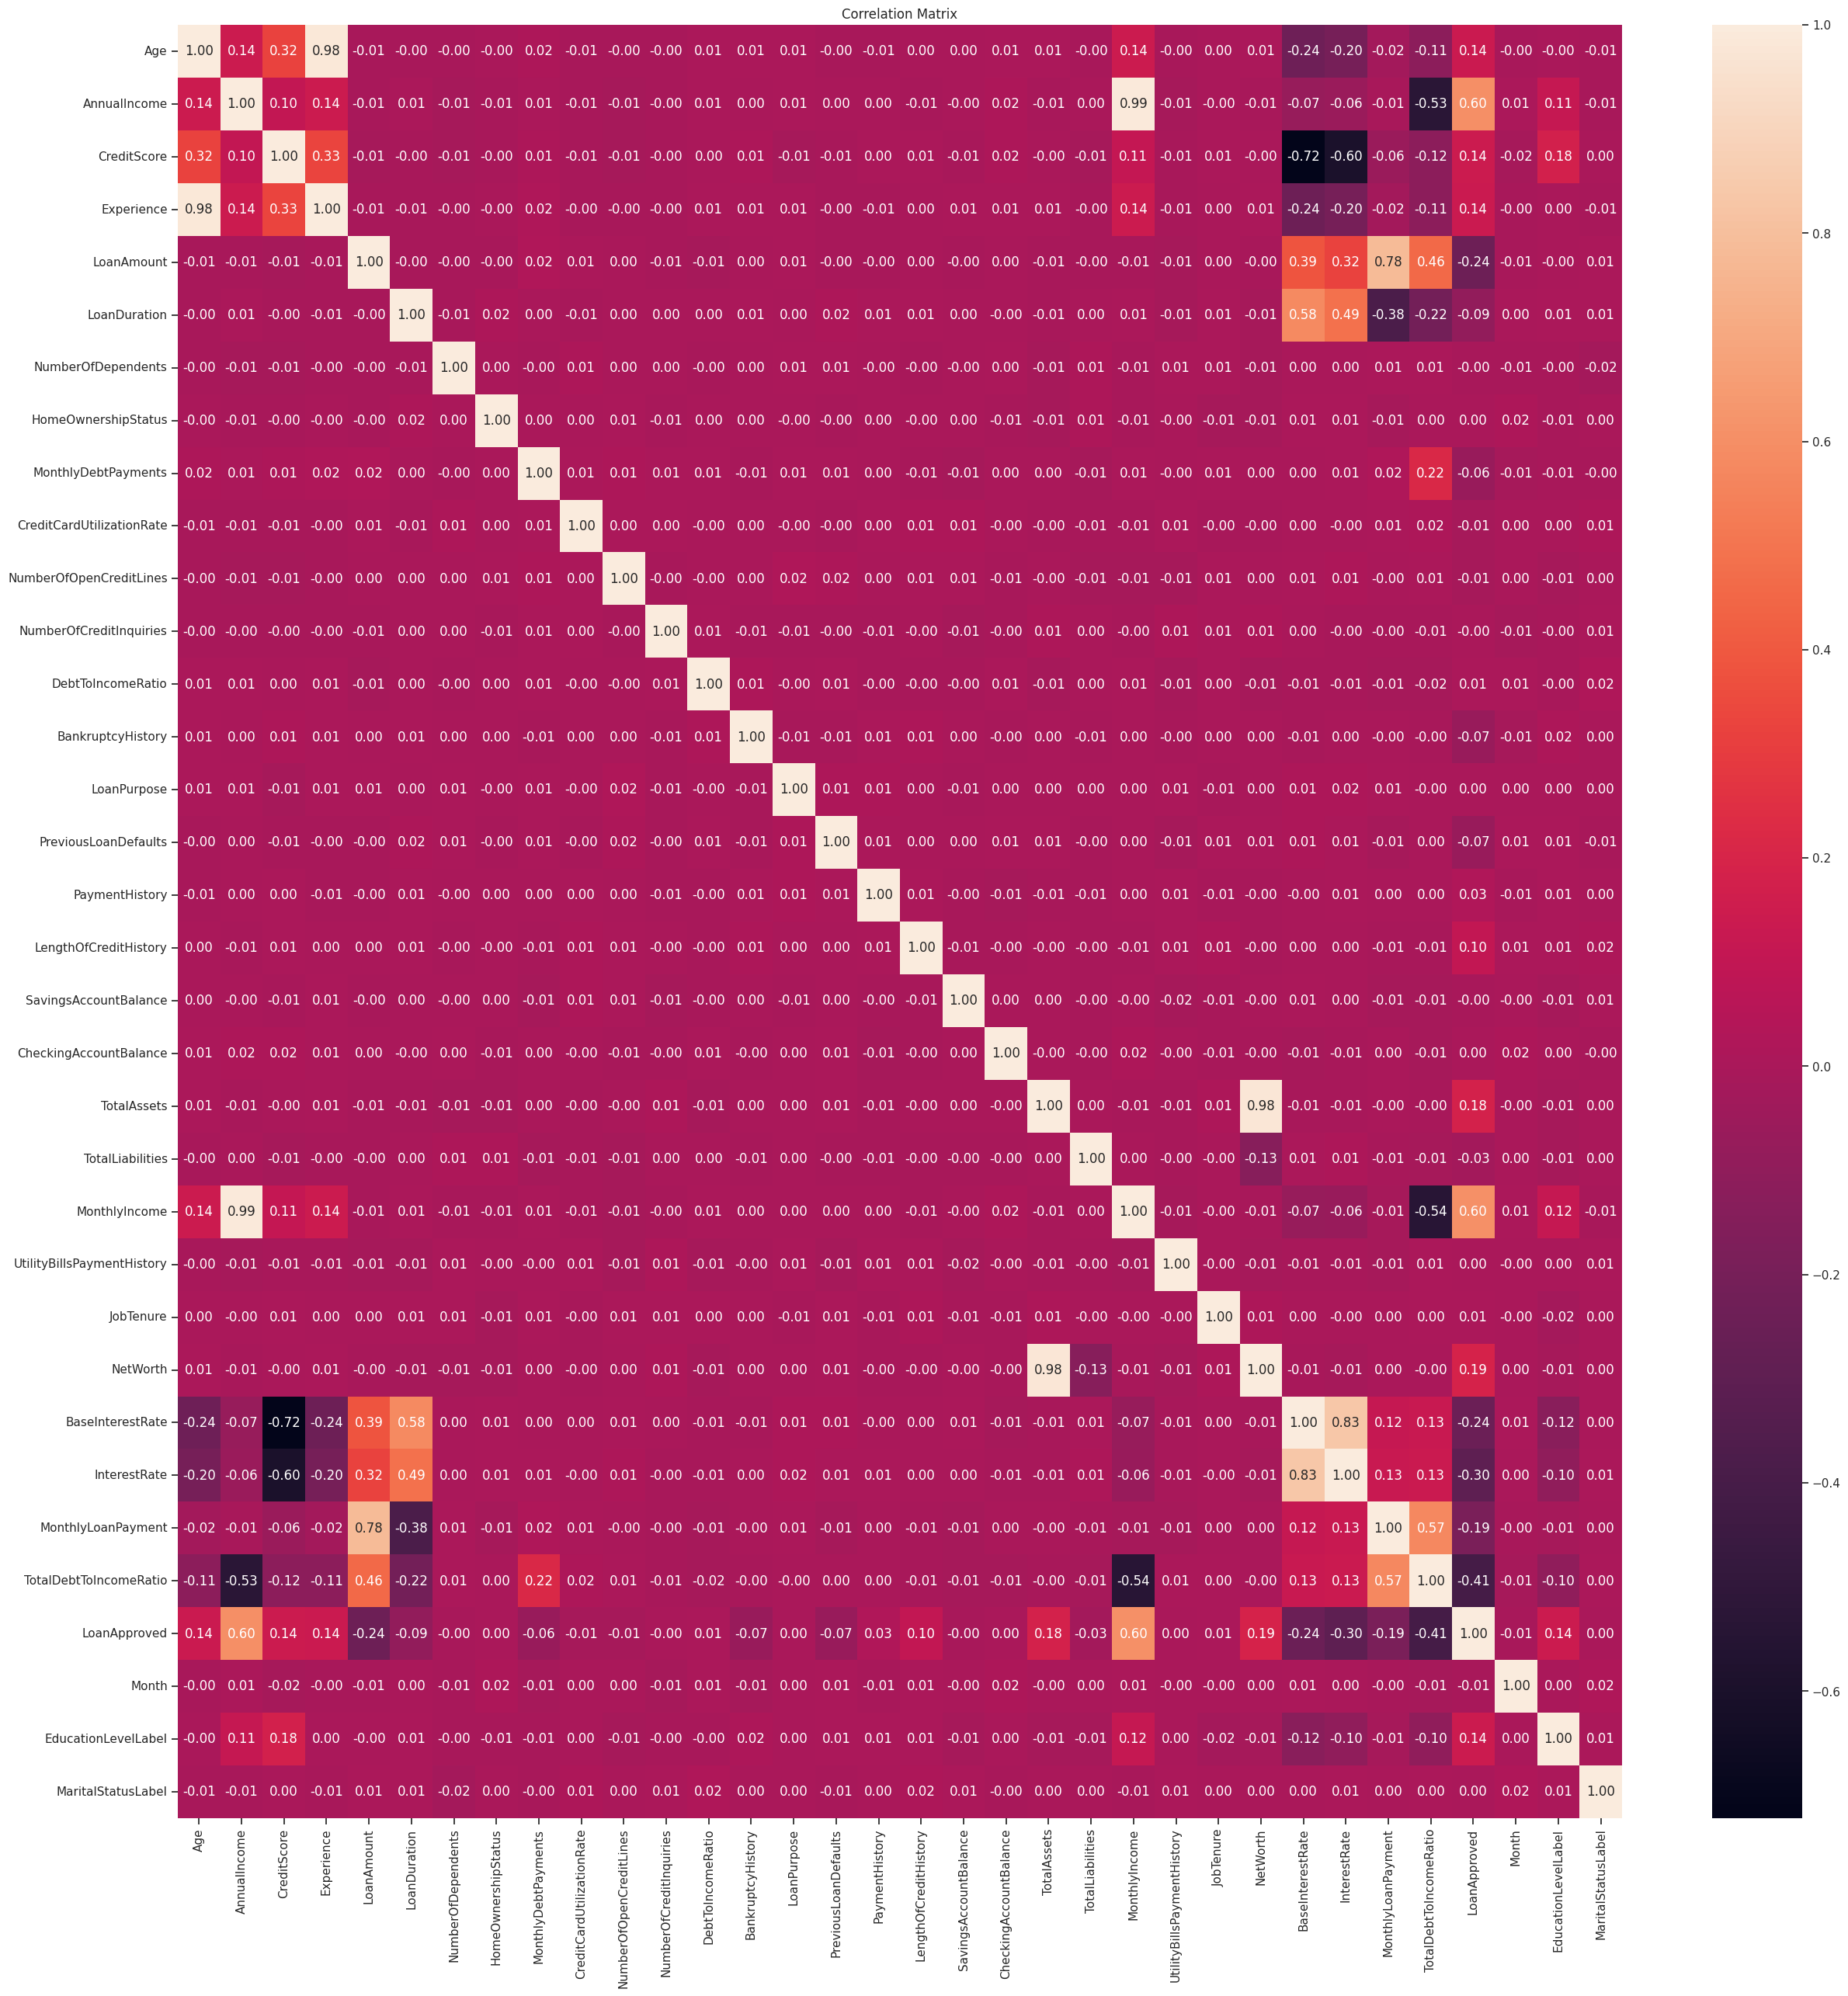

In [50]:
# Correlation matrix
corr_mat = X_train.corr()

# Heatmap plot for correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(corr_mat, annot = True, fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [51]:
# Define the correlation threshold
th = 0.7

# Identify feature pairs with strong correlation
strong_corr_pairs = []
for i in range(len(corr_mat.columns)):
    for j in range(i):
        # Evaluate if the absolute correlation is higher than the threshold
        if abs(corr_mat.iloc[i, j]) > th:
            strong_corr_pairs.append((corr_mat.columns[i], corr_mat.columns[j]))

for pair in strong_corr_pairs:
    feature_1, feature_2 = pair
    interaction_column_name = f"{feature_1}_{feature_2}"

    X_train[interaction_column_name] = X_train[feature_1] * X_train[feature_2]

# Show all pairs of with strong correlation features
strong_corr_pairs

[('Experience', 'Age'),
 ('MonthlyIncome', 'AnnualIncome'),
 ('NetWorth', 'TotalAssets'),
 ('BaseInterestRate', 'CreditScore'),
 ('InterestRate', 'BaseInterestRate'),
 ('MonthlyLoanPayment', 'LoanAmount')]

In [52]:
# Create interaction features in X_test
X_test['Experience_Age'] = X_test['Experience'] * X_test['Age']
X_test['MonthlyIncome_AnnualIncome'] = X_test['MonthlyIncome'] * X_test['AnnualIncome']
X_test['NetWorth_TotalAssets'] = X_test['NetWorth'] * X_test['TotalAssets']
X_test['BaseInterestRate_CreditScore'] = X_test['BaseInterestRate'] * X_test['CreditScore']
X_test['InterestRate_BaseInterestRate'] = X_test['InterestRate'] * X_test['BaseInterestRate']
X_test['MonthlyLoanPayment_LoanAmount'] = X_test['MonthlyLoanPayment'] * X_test['LoanAmount']

In [53]:
# Drop the unused columns
X_train = X_train.drop(columns = ['Experience', 'Age', 'MonthlyIncome', 'AnnualIncome', 'NetWorth', 'TotalAssets', 'InterestRate', 'BaseInterestRate', 'MonthlyLoanPayment', 'LoanAmount', 'CreditScore'])
X_test = X_test.drop(columns = ['Experience', 'Age', 'MonthlyIncome', 'AnnualIncome', 'NetWorth', 'TotalAssets', 'InterestRate', 'BaseInterestRate', 'MonthlyLoanPayment', 'LoanAmount', 'CreditScore'])

In [54]:
# Calculate the VIF scores for each feature
def calculate_vif(X):
  vif = pd.DataFrame()
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

vif_df = calculate_vif(X_train)
vif_df

,Features,VIF
0,LoanDuration,3.179946
1,NumberOfDependents,0.999349
2,HomeOwnershipStatus,0.999686
3,MonthlyDebtPayments,1.076007
4,CreditCardUtilizationRate,0.996198
5,NumberOfOpenCreditLines,0.997849
6,NumberOfCreditInquiries,0.999490
7,DebtToIncomeRatio,0.997090
8,BankruptcyHistory,1.010302
9,LoanPurpose,1.000948


VIF score of all features is below five.

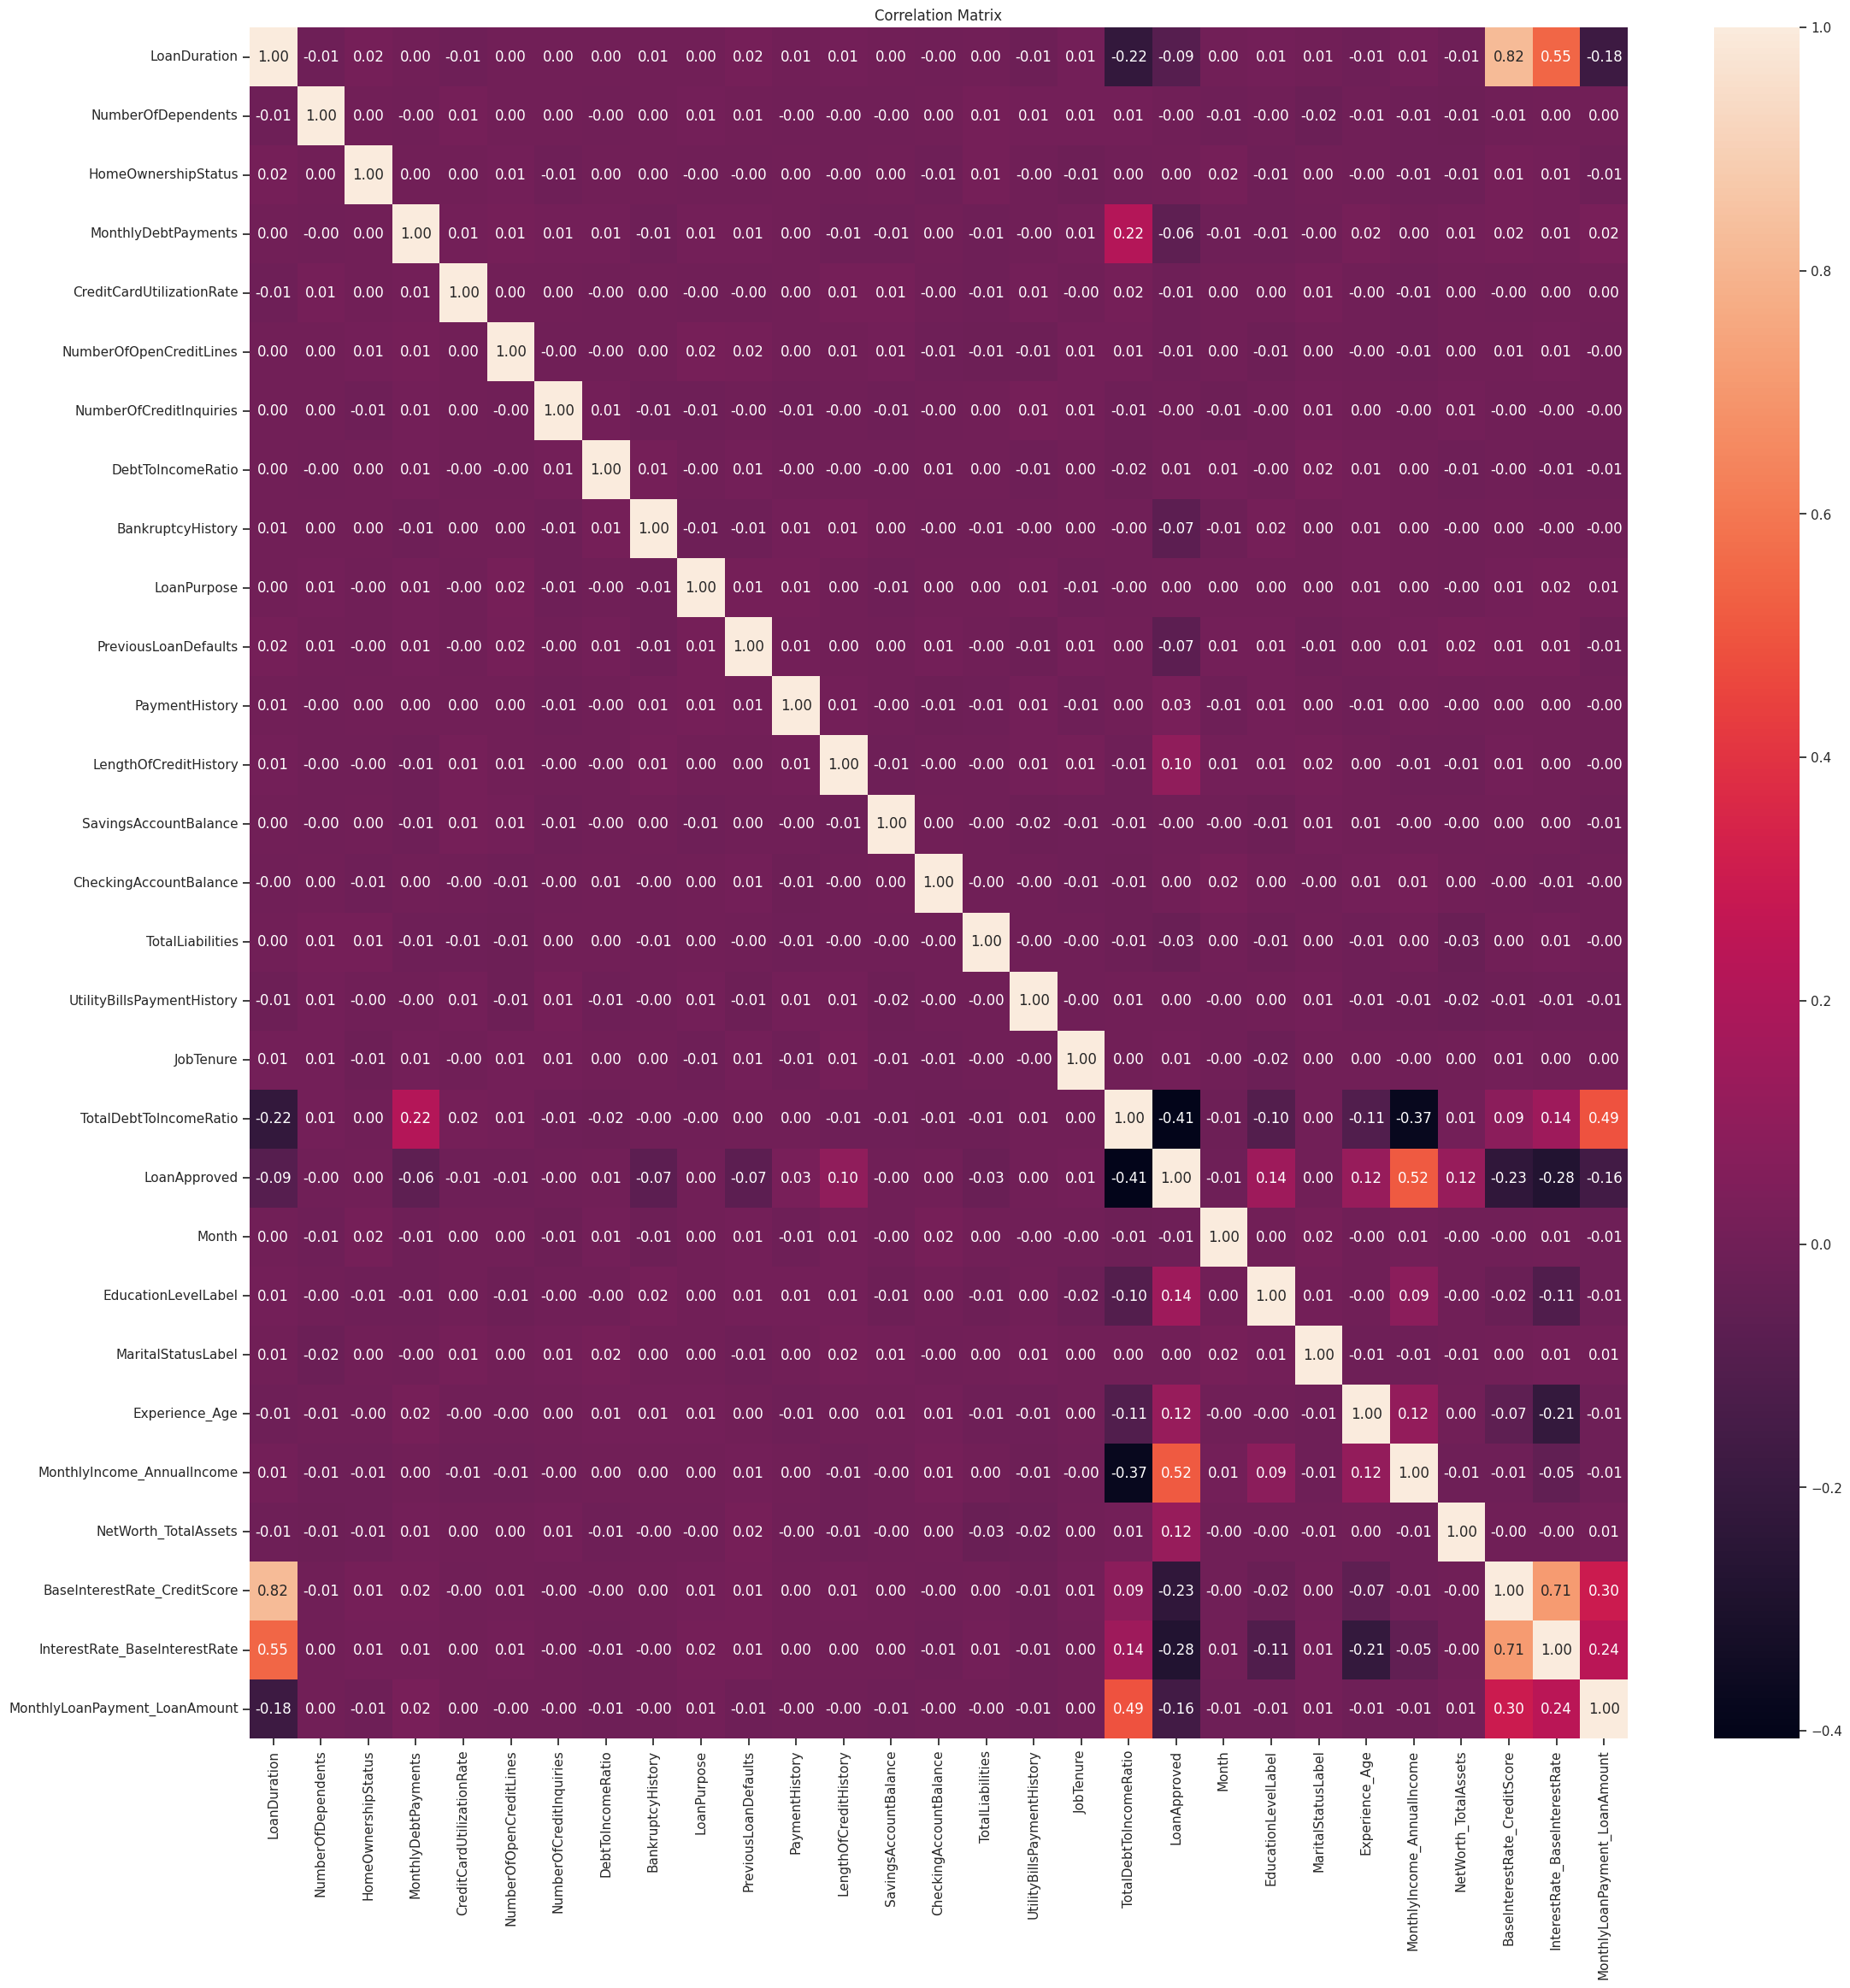

In [55]:
# Correlation matrix
corr_mat = X_train.corr()

# Heatmap plot for correlation matrix
plt.figure(figsize=(26, 26))
sns.heatmap(corr_mat, annot = True, fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [56]:
# Initialize a variety of regression models
GBR = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
LGBMR = LGBMRegressor(n_estimators = 100, random_state = 42)
XGBR = XGBRegressor(n_estimators = 100, max_depth = 4, eval_metric = 'rmse', random_state = 42)
RFR = RandomForestRegressor(n_estimators = 100, random_state = 42)
DTR = DecisionTreeRegressor(random_state = 42)
CBR = CatBoostRegressor(iterations = 100, logging_level = 'Silent', random_state = 42)

In [57]:
# Train all regression model using train data
GBR.fit(X_train, y_train)
LGBMR.fit(X_train, y_train)
XGBR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
DTR.fit(X_train, y_train)
CBR.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3723
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 29
[LightGBM] [Info] Start training from score 50.843600


In [58]:
# Predict target values on test data
predict1test = GBR.predict(X_test)
predict2test = LGBMR.predict(X_test)
predict3test = XGBR.predict(X_test)
predict4test = RFR.predict(X_test)
predict5test = DTR.predict(X_test)
predict6test = CBR.predict(X_test)

In [59]:
# Predict target values on train data
predict1train = GBR.predict(X_train)
predict2train = LGBMR.predict(X_train)
predict3train = XGBR.predict(X_train)
predict4train = RFR.predict(X_train)
predict5train = DTR.predict(X_train)
predict6train = CBR.predict(X_train)

In [60]:
# Calculate the RMSE of each predicted model by comparing the model predictions to the y_test
rmse1 = np.sqrt(mean_squared_error(y_test, predict1test))
rmse2 = np.sqrt(mean_squared_error(y_test, predict2test))
rmse3 = np.sqrt(mean_squared_error(y_test, predict3test))
rmse4 = np.sqrt(mean_squared_error(y_test, predict4test))
rmse5 = np.sqrt(mean_squared_error(y_test, predict5test))
rmse6 = np.sqrt(mean_squared_error(y_test, predict6test))

In [61]:
# Calculate the R-squared of each predicted model by comparing the model predictions to the y_test
rsquared1 = r2_score(y_test, predict1test)
rsquared2 = r2_score(y_test, predict2test)
rsquared3 = r2_score(y_test, predict3test)
rsquared4 = r2_score(y_test, predict4test)
rsquared5 = r2_score(y_test, predict5test)
rsquared6 = r2_score(y_test, predict6test)

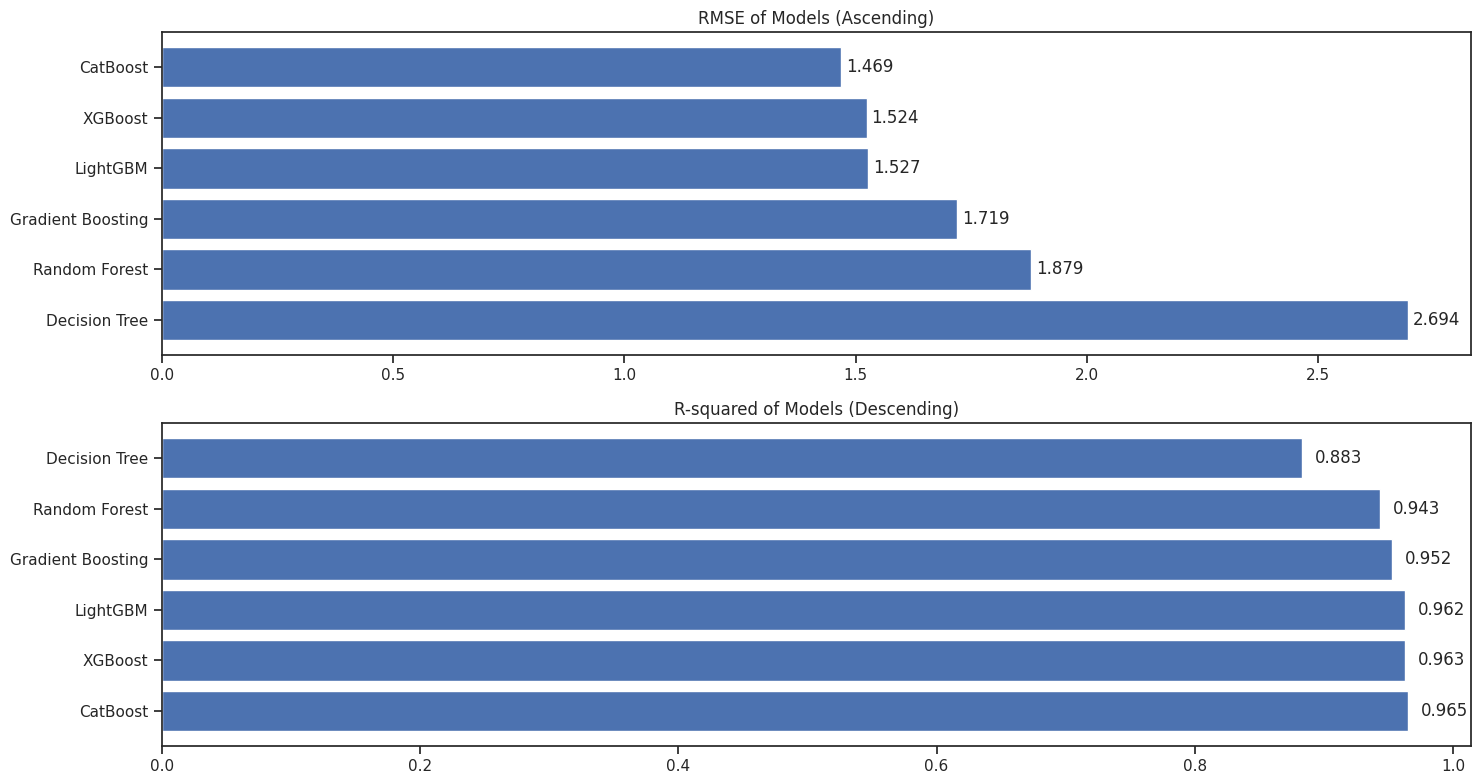

In [62]:
# Visualization of model performance comparison based on RMSE and R-squared
rmse_values = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6]
rsquared_values = [rsquared1, rsquared2, rsquared3, rsquared4, rsquared5, rsquared6]
model_names = ['Gradient Boosting', 'LightGBM', 'XGBoost', 'Random Forest', 'Decision Tree', 'CatBoost']

rmse_sort_indices = np.argsort(rmse_values)
rmse_sort_values = np.array(rmse_values)[rmse_sort_indices]
model_rmse_sort = np.array(model_names)[rmse_sort_indices]

rsquared_sort_indices = np.argsort(rsquared_values)
rsquared_sort_values = np.array(rsquared_values)[rsquared_sort_indices]
model_rsquared_sort = np.array(model_names)[rsquared_sort_indices]

fig, ax = plt.subplots(2, 1, figsize = (15, 8))

bars_rmse = ax[0].barh(model_rmse_sort, rmse_sort_values)
ax[0].set_title('RMSE of Models (Ascending)')
ax[0].invert_yaxis()

for bar in bars_rmse:
    width = bar.get_width()
    ax[0].text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')

bars_rsquared = ax[1].barh(model_rsquared_sort, rsquared_sort_values)
ax[1].set_title('R-squared of Models (Descending)')
ax[1].invert_yaxis()

for bar in bars_rsquared:
    width = bar.get_width()
    ax[1].text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')

plt.tight_layout()
plt.show()

Catboost has the lowest RMSE value and the highest R-squared value.

# Modeling - Evaluation

In [63]:
# Initialize test_pred and y_test are already defined
y_true = y_train
y_pred = predict6train

# Calculate evaluation results
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rsquared = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Create a DataFrame to display RMSE and MAE
resultstrain = pd.DataFrame({
    'Metric': ['RMSE', 'Rsquared', 'MAE'],
    'Value': [rmse, rsquared, mae]})

# Display the results
resultstrain

,Metric,Value
0,RMSE,1.261671
1,Rsquared,0.973501
2,MAE,0.936695


In [64]:
# Initialize test_pred and y_test are already defined
y_true = y_test
y_pred = predict6test

# Calculate evaluation results
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rsquared = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Create a DataFrame to display RMSE and MAE
resultstest = pd.DataFrame({
    'Metric': ['RMSE', 'Rsquared', 'MAE'],
    'Value': [rmse, rsquared, mae]})

# Display the results
resultstest

,Metric,Value
0,RMSE,1.468604
1,Rsquared,0.965262
2,MAE,1.087948


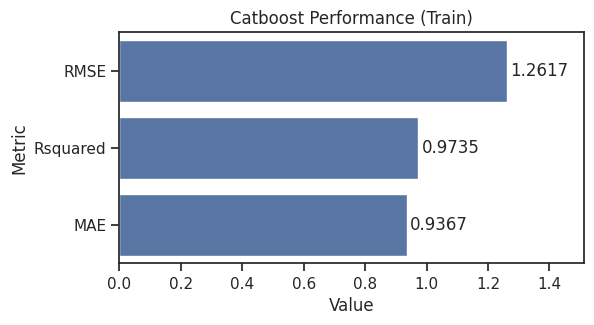

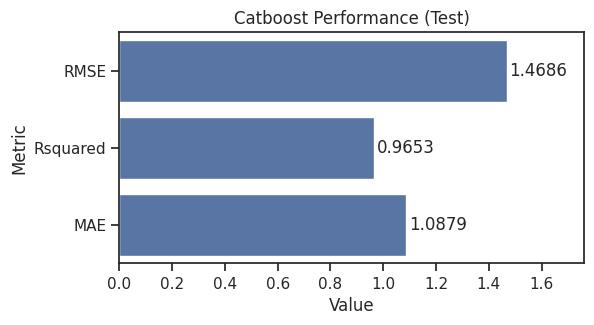

In [65]:
# Plotting RMSE and MAE results
plt.figure(figsize = (6, 3))
sns.barplot(x = 'Value', y = 'Metric', data = resultstrain)
for index, column in resultstrain.iterrows():
  plt.text(column['Value'] + 0.01, index, f"{column['Value']:.4f}", va = 'center')
plt.title('Catboost Performance (Train)')
plt.xlim(0, max(resultstrain['Value']) * 1.2)
plt.show()

plt.figure(figsize = (6, 3))
sns.barplot(x = 'Value', y = 'Metric', data = resultstest)
for index, column in resultstest.iterrows():
  plt.text(column['Value'] + 0.01, index, f"{column['Value']:.4f}", va = 'center')
plt.title('Catboost Performance (Test)')
plt.xlim(0, max(resultstest['Value']) * 1.2)
plt.show()

RMSE, Rsquared, and MAE in the train data and test data have similar values ​​so this model is fit.

# Feature Importance

In [66]:
# Display the feature importance
importance = CBR.get_feature_importance()
feature_importance = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = True)
feature_importance

,Feature,Importance
2,HomeOwnershipStatus,0.000000
6,NumberOfCreditInquiries,0.001790
22,MaritalStatusLabel,0.004315
9,LoanPurpose,0.005538
1,NumberOfDependents,0.012490
5,NumberOfOpenCreditLines,0.024355
17,JobTenure,0.026852
21,EducationLevelLabel,0.028944
18,TotalDebtToIncomeRatio,0.031527
16,UtilityBillsPaymentHistory,0.035073


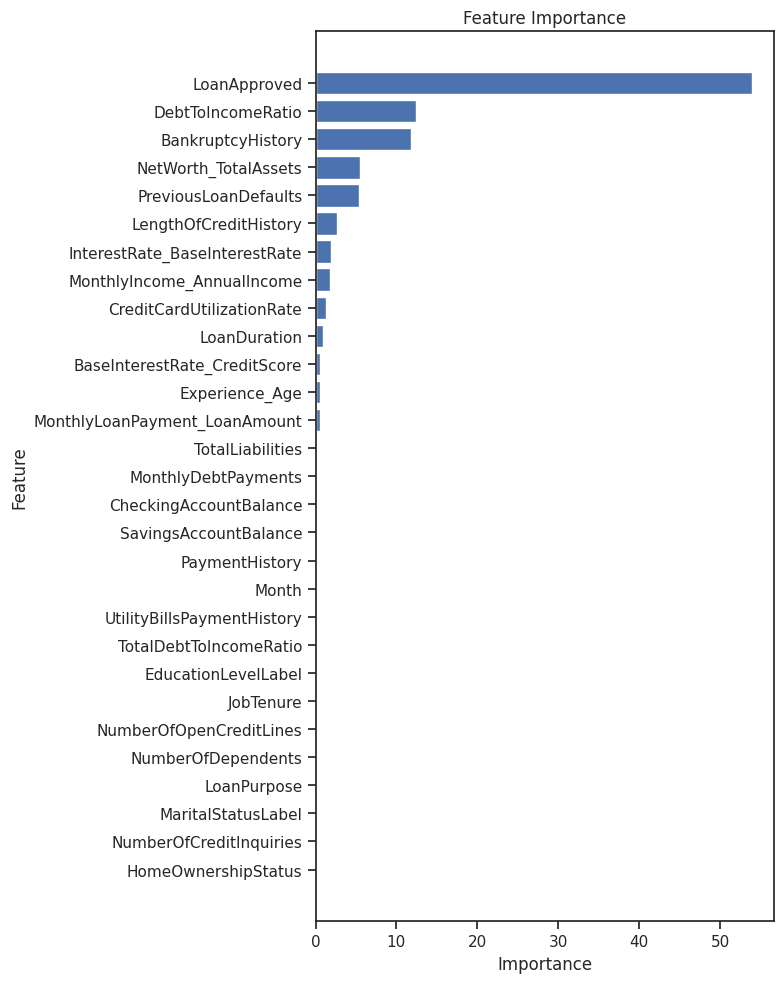

In [67]:
# Plotting feature importance
plt.figure(figsize = (8, 10))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [68]:
catboost_exp = dx.Explainer(CBR, X_train, y_train, label = 'CatBoost Interpretation')
catboost_exp

Preparation of a new explainer is initiated

  -> data              : 16000 rows 29 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 16000 values
  -> model_class       : catboost.core.CatBoostRegressor (default)
  -> label             : CatBoost Interpretation
  -> predict function  : <function yhat_default at 0x7885ad3aa200> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 28.6, mean = 50.8, max = 79.5
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.74, mean = -5.78e-05, max = 5.61
  -> model_info        : package catboost

A new explainer has been created!


In [69]:
catboost_exp.model_parts().plot()

Top 3 features that influence RiskScore:
1. LoanApproved
2. DebtToIncomeRatio
3. BankruptcyHistory

# Summary

The best regressor model is **CatBoost**.

# Recommendation

- Offering credit at lower interest rates to low-income borrowers, to reduce their repayment burden.
- Provide loyalty or reward programs for customers who have permanent and stable employment status. These programs can include cashback or reward points that can be used for other financial products.
- Providing credit products with more flexible options, including installment arrangements that can be adjusted to financial conditions. For example, mortgage products, credit for education, or pension credit with low interest rates adjusted to age categories.